In [1]:
# 9318
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import array as arr
import os
import json
import time
import math
import csv
import sklearn
import sklearn.metrics
from datetime import datetime
from sklearn.metrics import mean_squared_error

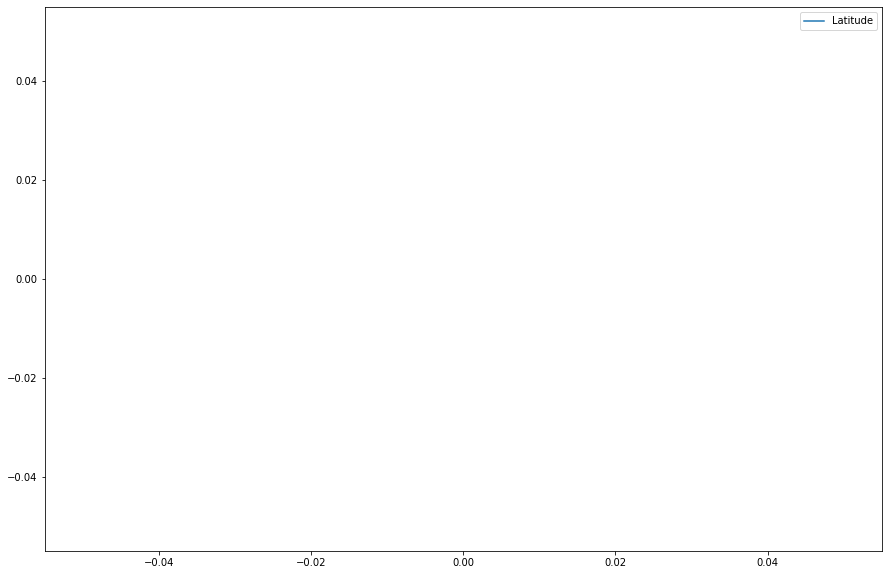

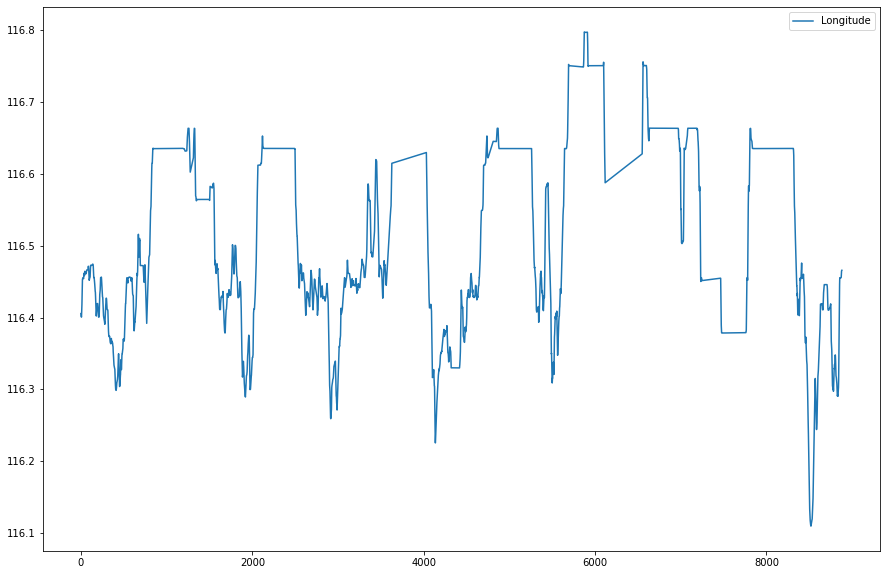

In [2]:
data= pd.read_csv("traffic/taxi_even/9318.csv")
Lan=[]
Lon=[]
Lat=data["Latitude"].tolist()
Lon=data["Longitude"].tolist()
Time=data["Time"].tolist()

plt.figure(figsize=(15,10))
plt.plot(Lan,label="Latitude")
plt.legend(loc='best')
plt.show()
plt.figure(figsize=(15,10))
plt.plot(Lon,label="Longitude")
plt.legend(loc='best')
plt.show()

In [3]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import load_model

(7700, 300, 1)
(7700,)
Epoch 1/3
257/257 [==============================] - 222s 854ms/step - loss: 0.0019
Epoch 2/3
257/257 [==============================] - 217s 845ms/step - loss: 7.1298e-05
Epoch 3/3
257/257 [==============================] - 219s 851ms/step - loss: 4.8769e-05


NameError: name 'sklearn' is not defined

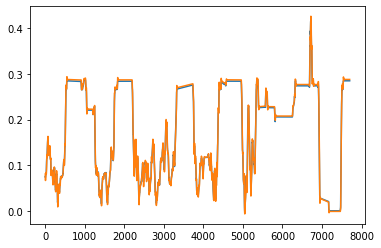

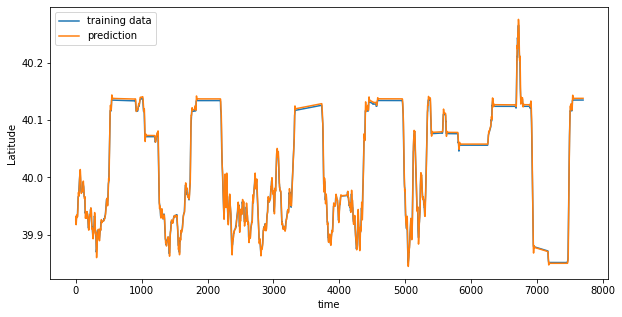

In [4]:
# train Latitude

# train_x lantitude into pieces of 60 datapoints
# eventimed lantitude & real lantitude
train_x=[]
train_y=[]
tempx=[]
N=[min(Lat),min(Lon)]
tempx = [number-N[0] for number in Lat]

n=300
x=8000
for i in range(n,x):
  train_x.append(tempx[i-n:i])
  train_y.append(tempx[i])
train_x,train_y=np.array(train_x),np.array(train_y)
train_x=train_x.reshape(train_x.shape[0],train_x.shape[1],1)
print(train_x.shape)
print(train_y.shape)

regressor=Sequential()
regressor.add(LSTM(units=n,return_sequences=True,input_shape=(train_x.shape[1],train_x.shape[2])))
regressor.add(Dropout(0.05))
regressor.add(LSTM(units=n))
regressor.add(Dropout(0.05))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(train_x,train_y,epochs=3,batch_size=30)
regressor.save('taxi_bejing_model.h5')
model=load_model("taxi_bejing_model.h5")
predicted_values=model.predict(train_x)
plt.plot(train_y,label="training data")
plt.plot(predicted_values,label="prediction")
temp1=[]
temp2=[]
temp2 = [number+N[0] for number in train_y]
predicted_values=model.predict(train_x)
temp1 = [number+N[0] for number in predicted_values]

plt.figure(figsize=(10,5))
plt.plot(temp2,label="training data")
plt.plot(temp1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("Latitude")

mse = sklearn.metrics.mean_squared_error(temp2, temp1)

rmse = math.sqrt(mse)

print(rmse)

(7700, 300, 1)
(7700,)
0.005072852983422489


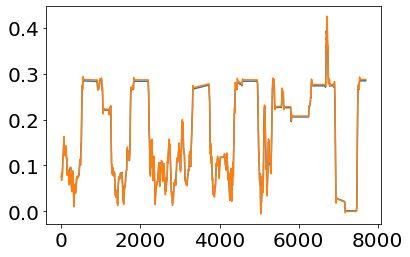

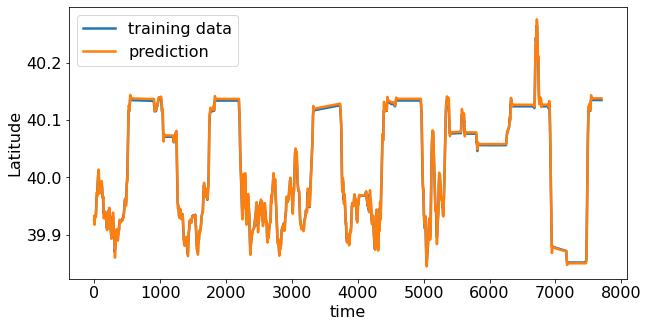

In [46]:
train_x=[]
train_y=[]
tempx=[]
N=[min(Lat),min(Lon)]
tempx = [number-N[0] for number in Lat]

n=300
x=8000
for i in range(n,x):
  train_x.append(tempx[i-n:i])
  train_y.append(tempx[i])
train_x,train_y=np.array(train_x),np.array(train_y)
train_x=train_x.reshape(train_x.shape[0],train_x.shape[1],1)
print(train_x.shape)
print(train_y.shape)
model=load_model("taxi_bejing_model.h5")
predicted_values=model.predict(train_x)
plt.plot(train_y,label="training data")
plt.plot(predicted_values,label="prediction")
temp1=[]
temp2=[]
temp2 = [number+N[0] for number in train_y]
predicted_values=model.predict(train_x)
temp1 = [number+N[0] for number in predicted_values]

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,5))
plt.plot(temp2,label="training data", linewidth=2.5)
plt.plot(temp1,label="prediction", linewidth=2.5)
plt.legend()
plt.xlabel("time")
plt.ylabel("Latitude")

mse = sklearn.metrics.mean_squared_error(temp2, temp1)

rmse = math.sqrt(mse)

print(rmse)

In [9]:
mse = sklearn.metrics.mean_squared_error(temp2, temp1)

rmse = math.sqrt(mse)
print(rmse)

0.005072852983422489


Epoch 1/3
247/247 [==============================] - 214s 857ms/step - loss: 0.0083
Epoch 2/3
247/247 [==============================] - 214s 867ms/step - loss: 9.1030e-04
Epoch 3/3
247/247 [==============================] - 216s 874ms/step - loss: 8.2269e-04


Text(0, 0.5, 'Latitude')

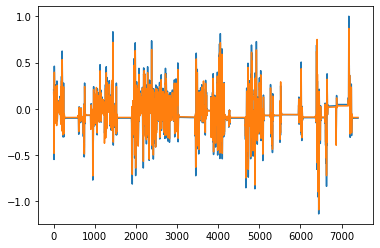

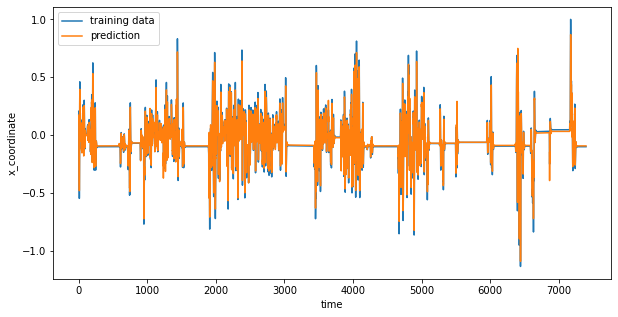

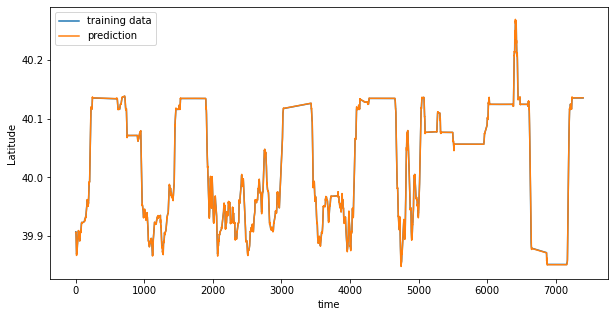

In [12]:
#model differences in Lat
difference=[]
for i in range(len(temp1)):
    difference.append((temp2[i]-temp1[i])*1)

coe=max(difference)
coe=1/coe
for i in range(len(difference)):
    difference[i]=difference[i]*coe
    
train_diff_x=[]
train_diff_y=[]
n=300
x=7700
#create training data x and y
for j in range(n,x):
  train_diff_x.append(difference[j-n:j])
  train_diff_y.append(difference[j])
train_diff_x,train_diff_y=np.array(train_diff_x),np.array(train_diff_y)
train_diff_x=train_diff_x.reshape(train_diff_x.shape[0],train_diff_x.shape[1],1)

regressor1=Sequential()
regressor1.add(LSTM(units=n,return_sequences=True,input_shape=(train_x.shape[1],train_x.shape[2])))
regressor1.add(Dropout(0.05))
regressor1.add(LSTM(units=n))
regressor1.add(Dropout(0.05))
regressor1.add(Dense(units=1))
regressor1.compile(optimizer='adam',loss='mean_squared_error')
regressor1.fit(train_diff_x,train_diff_y,epochs=3,batch_size=30)
regressor1.save('difference_model.h5')
model_diff=load_model("difference_model.h5")
predicted_diff=model_diff.predict(train_diff_x)
plt.plot(train_diff_y,label="training difference")
plt.plot(predicted_diff,label="predicted difference")
diff1=[]
diff2=[]
diff2 = [number for number in train_diff_y]
diff1 = [number for number in predicted_diff]
plt.figure(figsize=(10,5))
plt.plot(diff2,label="training data")
plt.plot(diff1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("x_coordinate")

# adding the result from diff1 and temp1
n=300
x=7700
totalpredict=[]
for i in range(n,x):
    totalpredict.append(temp1[i]+diff1[i-300]/coe)

plt.figure(figsize=(10,5))
plt.plot(temp2[300:],label="training data")
plt.plot(totalpredict,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("Latitude")


Text(0, 0.5, 'Latitude')

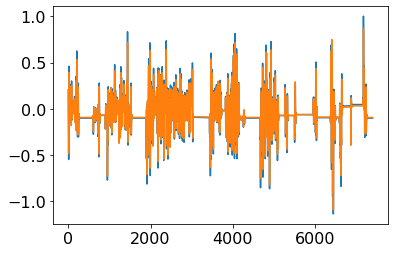

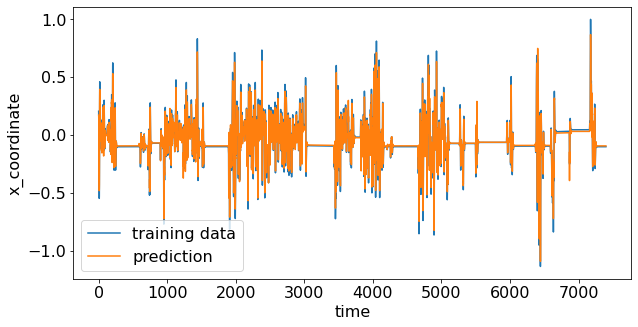

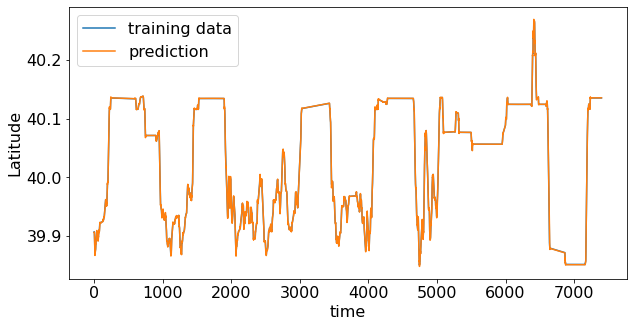

In [47]:
difference=[]
for i in range(len(temp1)):
    difference.append((temp2[i]-temp1[i])*1)

coe=max(difference)
coe=1/coe
for i in range(len(difference)):
    difference[i]=difference[i]*coe
    
train_diff_x=[]
train_diff_y=[]
n=300
x=7700
#create training data x and y
for j in range(n,x):
  train_diff_x.append(difference[j-n:j])
  train_diff_y.append(difference[j])
train_diff_x,train_diff_y=np.array(train_diff_x),np.array(train_diff_y)
train_diff_x=train_diff_x.reshape(train_diff_x.shape[0],train_diff_x.shape[1],1)

model_diff=load_model("difference_model.h5")
predicted_diff=model_diff.predict(train_diff_x)
plt.plot(train_diff_y,label="training difference")
plt.plot(predicted_diff,label="predicted difference")
diff1=[]
diff2=[]
diff2 = [number for number in train_diff_y]
diff1 = [number for number in predicted_diff]
plt.figure(figsize=(10,5))
plt.plot(diff2,label="training data")
plt.plot(diff1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("x_coordinate")

# adding the result from diff1 and temp1
n=300
x=7700
totalpredict=[]
for i in range(n,x):
    totalpredict.append(temp1[i]+diff1[i-300]/coe)

plt.figure(figsize=(10,5))
plt.plot(temp2[300:],label="training data")
plt.plot(totalpredict,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("Latitude")


In [13]:
mse = sklearn.metrics.mean_squared_error(temp2[300:], totalpredict)

rmse = math.sqrt(mse)

print(rmse)

0.0009423914689187842


[0.00973892]
[102.68077]
7400
Epoch 1/3
237/237 [==============================] - 211s 881ms/step - loss: 0.0080
Epoch 2/3
237/237 [==============================] - 219s 924ms/step - loss: 0.0068
Epoch 3/3
237/237 [==============================] - 212s 894ms/step - loss: 0.0067


Text(0, 0.5, 'Latitude')

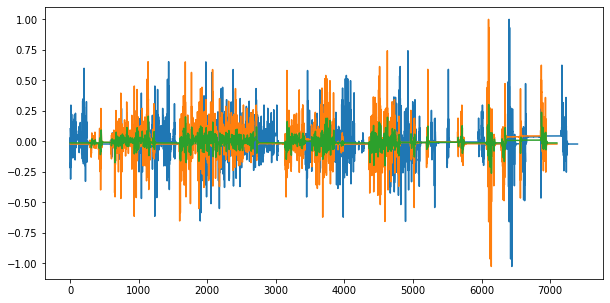

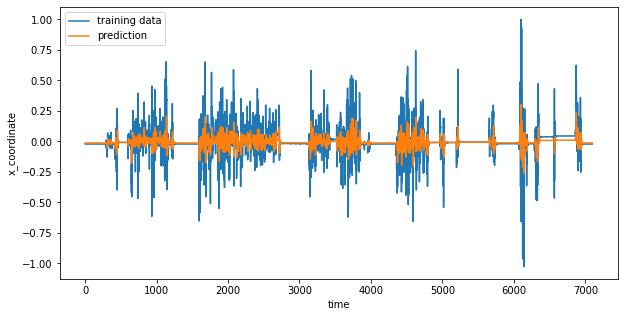

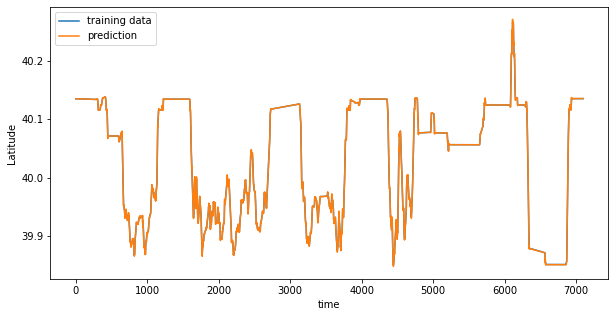

In [14]:
#model differences2 in Lat
difference2=[]
for i in range(len(totalpredict)):
    difference2.append((temp2[i+300]-totalpredict[i])*1)

coe=max(difference2)
print(coe)
coe=1/coe
print(coe)
for i in range(len(difference2)):
    difference2[i]=difference2[i]*coe
    
plt.figure(figsize=(10,5))
plt.plot(difference2)
print(len(difference2))
train_diff_x=[]
train_diff_y=[]
n=300
x=7400
#create training data x and y
for j in range(n,x):
  train_diff_x.append(difference2[j-n:j])
  train_diff_y.append(difference2[j])
train_diff_x,train_diff_y=np.array(train_diff_x),np.array(train_diff_y)
train_diff_x=train_diff_x.reshape(train_diff_x.shape[0],train_diff_x.shape[1],1)

regressor2=Sequential()
regressor2.add(LSTM(units=n,return_sequences=True,input_shape=(train_x.shape[1],train_x.shape[2])))
regressor2.add(Dropout(0.05))
regressor2.add(LSTM(units=n))
regressor2.add(Dropout(0.05))
regressor2.add(Dense(units=1))
regressor2.compile(optimizer='adam',loss='mean_squared_error')
regressor2.fit(train_diff_x,train_diff_y,epochs=3,batch_size=30)
regressor2.save('difference2_model.h5')
model_diff=load_model("difference2_model.h5")
predicted_diff=model_diff.predict(train_diff_x)
plt.plot(train_diff_y,label="training difference")
plt.plot(predicted_diff,label="predicted difference")
diff1=[]
diff2=[]
diff2 = [number for number in train_diff_y]
diff1 = [number for number in predicted_diff]
plt.figure(figsize=(10,5))
plt.plot(diff2,label="training data")
plt.plot(diff1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("x_coordinate")

# adding the result from diff1 and totalpredict
n=300
x=7400
finalpredict=[]
for i in range(n,x):
    finalpredict.append(totalpredict[i]+diff1[i-300]/coe)

plt.figure(figsize=(10,5))
plt.plot(temp2[600:],label="training data")
plt.plot(finalpredict,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("Latitude")

[0.00973892]
[102.68077]
7400


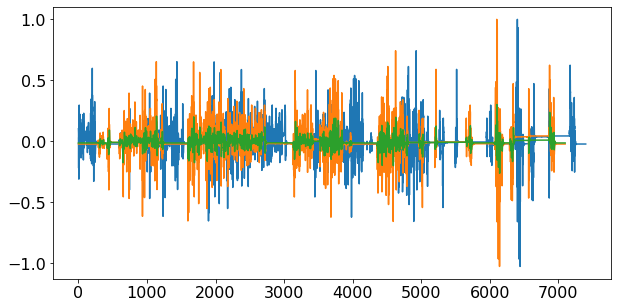

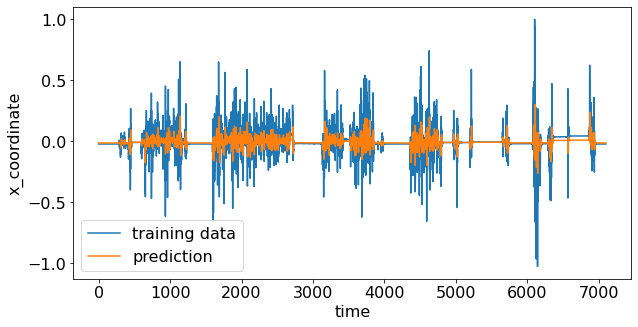

In [48]:
difference2=[]
for i in range(len(totalpredict)):
    difference2.append((temp2[i+300]-totalpredict[i])*1)

coe=max(difference2)
print(coe)
coe=1/coe
print(coe)
for i in range(len(difference2)):
    difference2[i]=difference2[i]*coe
    
plt.figure(figsize=(10,5))
plt.plot(difference2)
print(len(difference2))
train_diff_x=[]
train_diff_y=[]
n=300
x=7400
#create training data x and y
for j in range(n,x):
  train_diff_x.append(difference2[j-n:j])
  train_diff_y.append(difference2[j])
train_diff_x,train_diff_y=np.array(train_diff_x),np.array(train_diff_y)
train_diff_x=train_diff_x.reshape(train_diff_x.shape[0],train_diff_x.shape[1],1)
model_diff=load_model("difference2_model.h5")
predicted_diff=model_diff.predict(train_diff_x)
plt.plot(train_diff_y,label="training difference")
plt.plot(predicted_diff,label="predicted difference")
diff1=[]
diff2=[]
diff2 = [number for number in train_diff_y]
diff1 = [number for number in predicted_diff]
plt.figure(figsize=(10,5))
plt.plot(diff2,label="training data")
plt.plot(diff1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("x_coordinate")

# adding the result from diff1 and totalpredict
n=300
x=7400
finalpredict=[]
for i in range(n,x):
    finalpredict.append(totalpredict[i]+diff1[i-300]/coe)



Text(0, 0.5, 'Latitude (deg)')

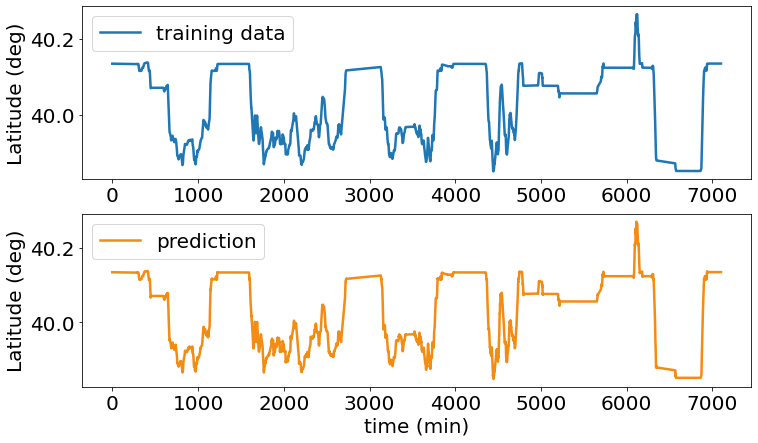

In [51]:

#plt.rcParams.update({'font.size': 16})
#plt.figure(figsize=(10,5))
#plt.plot(temp2[600:],label="training data", linewidth=2.5)
#plt.plot(finalpredict,label="prediction", linewidth=2.5)
#plt.legend()
#plt.xlabel("time")
#plt.ylabel("Latitude")

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(12,7))
plt.subplot(2, 1, 1)
plt.plot(temp2[600:],label="training data", linewidth=2.5)
plt.legend()
plt.ylabel('Latitude (deg)')


plt.subplot(2, 1, 2)
plt.plot(finalpredict, color='#F38C12',label="prediction", linewidth=2.5)
plt.legend()
plt.xlabel('time (min)')
plt.ylabel('Latitude (deg)')


In [9]:
# 80 meters
mse = sklearn.metrics.mean_squared_error(temp2[600:], finalpredict)

rmse = math.sqrt(mse)

print(rmse)

0.000817413258064952


(7700, 300, 1)
(7700,)
Epoch 1/3
257/257 [==============================] - 241s 928ms/step - loss: 0.0106
Epoch 2/3
257/257 [==============================] - 251s 979ms/step - loss: 2.0485e-04
Epoch 3/3
257/257 [==============================] - 243s 944ms/step - loss: 1.7039e-04


Text(0, 0.5, 'Longitude')

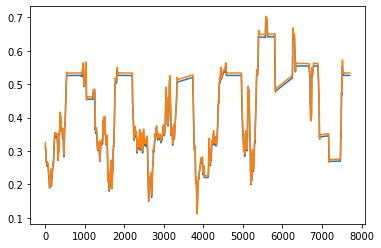

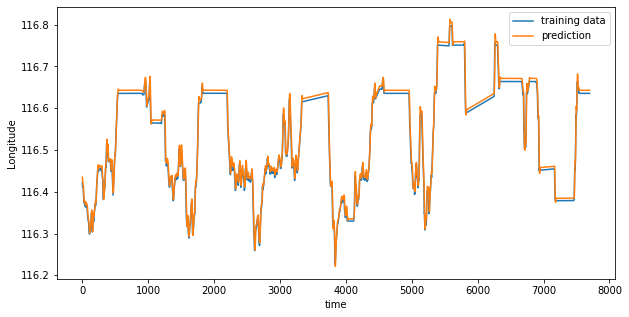

In [16]:
# train Longitude

# train_x Longitude into pieces of 60 datapoints
# eventimed Longitude & real Longitude
train_x=[]
train_y=[]
tempx=[]
temp=Lon[:8000]
tempx = [number-N[1] for number in temp]

n=300
x=8000
for i in range(n,x):
  train_x.append(tempx[i-n:i])
  train_y.append(tempx[i])
train_x,train_y=np.array(train_x),np.array(train_y)
train_x=train_x.reshape(train_x.shape[0],train_x.shape[1],1)
print(train_x.shape)
print(train_y.shape)

regressor=Sequential()
regressor.add(LSTM(units=n,return_sequences=True,input_shape=(train_x.shape[1],train_x.shape[2])))
regressor.add(Dropout(0.05))
regressor.add(LSTM(units=n))
regressor.add(Dropout(0.05))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(train_x,train_y,epochs=3,batch_size=30)
regressor.save('taxi_bejing_model_2.h5')
model2=load_model("taxi_bejing_model_2.h5")
predicted_values=model2.predict(train_x)
plt.plot(train_y,label="training data")
plt.plot(predicted_values,label="prediction")
temp1=[]
temp2=[]
temp2 = [number+N[1] for number in train_y]
temp1 = [number+N[1] for number in predicted_values]

plt.figure(figsize=(10,5))
plt.plot(temp2,label="training data")
plt.plot(temp1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("Longitude")

(7700, 300, 1)
(7700,)


Text(0, 0.5, 'Longitude')

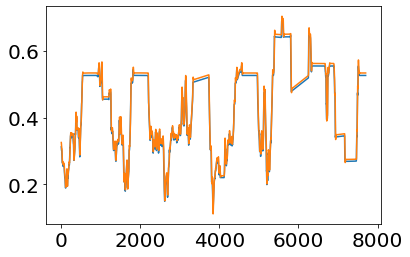

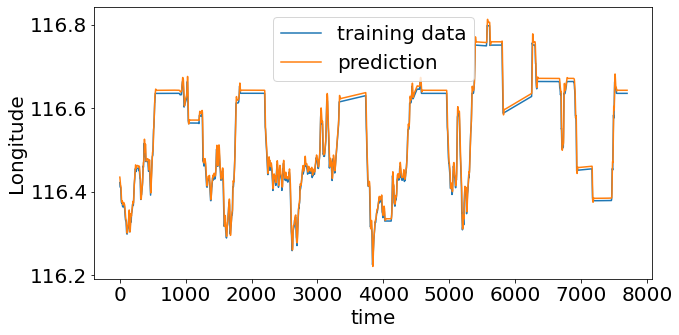

In [52]:
train_x=[]
train_y=[]
tempx=[]
temp=Lon[:8000]
tempx = [number-N[1] for number in temp]

n=300
x=8000
for i in range(n,x):
  train_x.append(tempx[i-n:i])
  train_y.append(tempx[i])
train_x,train_y=np.array(train_x),np.array(train_y)
train_x=train_x.reshape(train_x.shape[0],train_x.shape[1],1)
print(train_x.shape)
print(train_y.shape)
model2=load_model("taxi_bejing_model_2.h5")
predicted_values=model2.predict(train_x)
plt.plot(train_y,label="training data")
plt.plot(predicted_values,label="prediction")
temp1=[]
temp2=[]
temp2 = [number+N[1] for number in train_y]
temp1 = [number+N[1] for number in predicted_values]

plt.figure(figsize=(10,5))
plt.plot(temp2,label="training data")
plt.plot(temp1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("Longitude")

In [17]:
mse = sklearn.metrics.mean_squared_error(temp2, temp1)

rmse = math.sqrt(mse)

print(rmse)

0.010792367708746045


In [ ]:
#model differences in Lon
difference=[]
for i in range(len(temp1)):
    difference.append((temp2[i]-temp1[i])*1)

coe=sum(difference)/len(difference)
coe=1/coe
for i in range(len(difference)):
    difference[i]=difference[i]*coe
    
train_diff_x=[]
train_diff_y=[]
n=300
x=7700
#create training data x and y
for j in range(n,x):
  train_diff_x.append(difference[j-n:j])
  train_diff_y.append(difference[j])
train_diff_x,train_diff_y=np.array(train_diff_x),np.array(train_diff_y)
train_diff_x=train_diff_x.reshape(train_diff_x.shape[0],train_diff_x.shape[1],1)

regressor1=Sequential()
regressor1.add(LSTM(units=n,return_sequences=True,input_shape=(train_x.shape[1],train_x.shape[2])))
regressor1.add(Dropout(0.05))
regressor1.add(LSTM(units=n))
regressor1.add(Dropout(0.05))
regressor1.add(Dense(units=1))
regressor1.compile(optimizer='adam',loss='mean_squared_error')
regressor1.fit(train_x,train_y,epochs=3,batch_size=30)
regressor1.save('difference_model_2.h5')
model_diff=load_model("difference_model_2.h5")
predicted_diff=model_diff.predict(train_diff_x)
plt.plot(train_diff_y,label="training difference")
plt.plot(predicted_diff,label="predicted difference")
diff1=[]
diff2=[]
diff2 = [number for number in train_diff_y]
diff1 = [number for number in predicted_diff]
plt.figure(figsize=(10,5))
plt.plot(diff2,label="training data")
plt.plot(diff1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("Lon")

Text(0, 0.5, 'Lon')

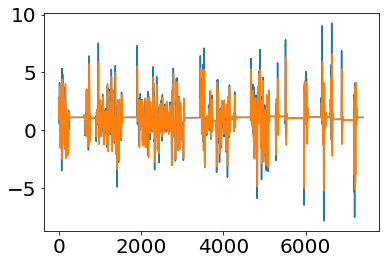

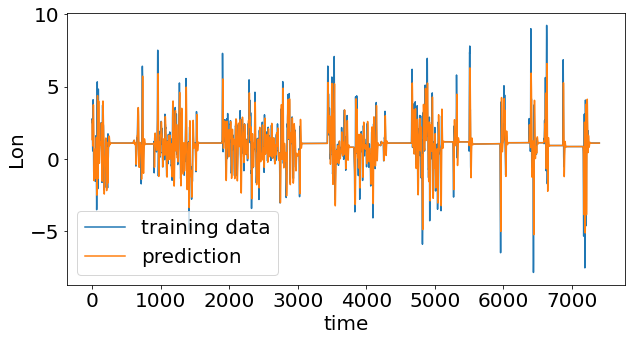

In [53]:
difference=[]
for i in range(len(temp1)):
    difference.append((temp2[i]-temp1[i])*1)

coe=sum(difference)/len(difference)
coe=1/coe
for i in range(len(difference)):
    difference[i]=difference[i]*coe
    
train_diff_x=[]
train_diff_y=[]
n=300
x=7700
#create training data x and y
for j in range(n,x):
  train_diff_x.append(difference[j-n:j])
  train_diff_y.append(difference[j])
train_diff_x,train_diff_y=np.array(train_diff_x),np.array(train_diff_y)
train_diff_x=train_diff_x.reshape(train_diff_x.shape[0],train_diff_x.shape[1],1)
model_diff=load_model("difference_model_2.h5")
predicted_diff=model_diff.predict(train_diff_x)
plt.plot(train_diff_y,label="training difference")
plt.plot(predicted_diff,label="predicted difference")
diff1=[]
diff2=[]
diff2 = [number for number in train_diff_y]
diff1 = [number for number in predicted_diff]
plt.figure(figsize=(10,5))
plt.plot(diff2,label="training data")
plt.plot(diff1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("Lon")

Text(0, 0.5, 'Longitude')

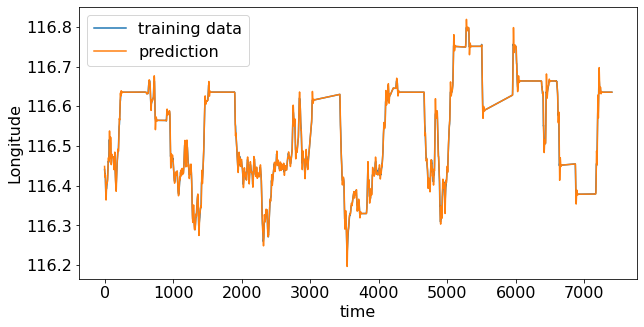

In [33]:
# adding the result from diff1 and temp1
n=300
x=7700
totalpredict=[]
for i in range(n,x):
    totalpredict.append(temp1[i]+diff1[i-300]/coe)

plt.figure(figsize=(10,5))
plt.plot(temp2[300:],label="training data")
plt.plot(totalpredict,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("Longitude")


In [20]:
mse = sklearn.metrics.mean_squared_error(temp2[300:], totalpredict)

rmse = math.sqrt(mse)

print(rmse)

0.0071794092264387595


[0.04191589]
[23.8573]
7400
Epoch 1/3
237/237 [==============================] - 315s 1s/step - loss: 0.0127
Epoch 2/3
237/237 [==============================] - 216s 913ms/step - loss: 0.0015
Epoch 3/3
237/237 [==============================] - 197s 829ms/step - loss: 8.6319e-04


Text(0, 0.5, 'Lon')

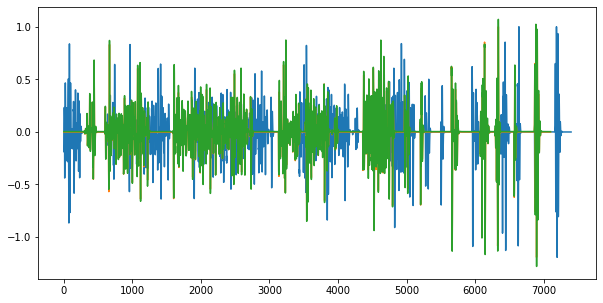

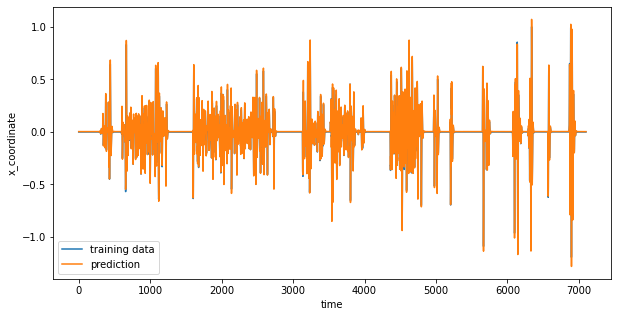

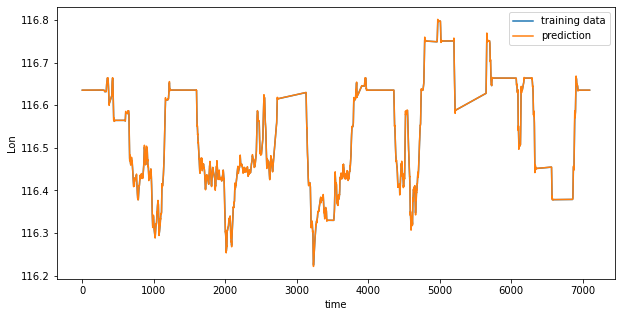

In [21]:
#model differences2 in Lat
difference2=[]
for i in range(len(totalpredict)):
    difference2.append((temp2[i+300]-totalpredict[i])*1)

coe=max(difference2)
print(coe)
coe=1/coe
print(coe)
for i in range(len(difference2)):
    difference2[i]=difference2[i]*coe
    
plt.figure(figsize=(10,5))
plt.plot(difference2)
print(len(difference2))
train_diff_x=[]
train_diff_y=[]
n=300
x=7400
#create training data x and y
for j in range(n,x):
  train_diff_x.append(difference2[j-n:j])
  train_diff_y.append(difference2[j])
train_diff_x,train_diff_y=np.array(train_diff_x),np.array(train_diff_y)
train_diff_x=train_diff_x.reshape(train_diff_x.shape[0],train_diff_x.shape[1],1)

regressor2=Sequential()
regressor2.add(LSTM(units=n,return_sequences=True,input_shape=(train_x.shape[1],train_x.shape[2])))
regressor2.add(Dropout(0.05))
regressor2.add(LSTM(units=n))
regressor2.add(Dropout(0.05))
regressor2.add(Dense(units=1))
regressor2.compile(optimizer='adam',loss='mean_squared_error')
regressor2.fit(train_diff_x,train_diff_y,epochs=3,batch_size=30)
regressor2.save('difference2_model_2.h5')
model_diff=load_model("difference2_model_2.h5")
predicted_diff=model_diff.predict(train_diff_x)
plt.plot(train_diff_y,label="training difference")
plt.plot(predicted_diff,label="predicted difference")
diff1=[]
diff2=[]
diff2 = [number for number in train_diff_y]
diff1 = [number for number in predicted_diff]
plt.figure(figsize=(10,5))
plt.plot(diff2,label="training data")
plt.plot(diff1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("x_coordinate")

# adding the result from diff1 and totalpredict
n=300
x=7400
finalpredict=[]
for i in range(n,x):
    finalpredict.append(totalpredict[i]+diff1[i-300]/coe)

plt.figure(figsize=(10,5))
plt.plot(temp2[600:],label="training data")
plt.plot(finalpredict,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("Longitude")

[76.70874]
[0.01303632]
7400


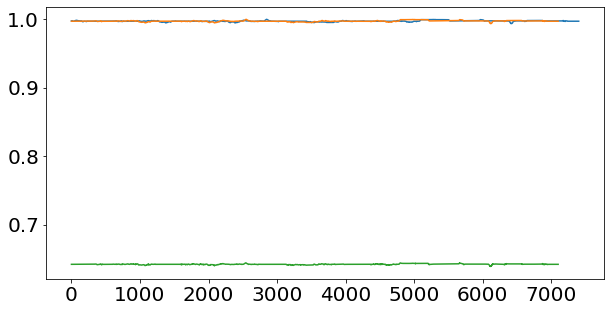

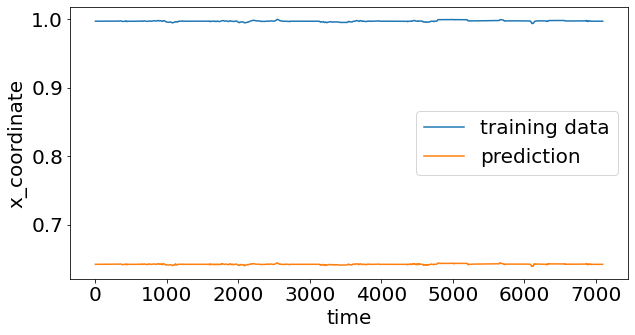

In [54]:
difference2=[]
for i in range(len(totalpredict)):
    difference2.append((temp2[i+300]-totalpredict[i])*1)

coe=max(difference2)
print(coe)
coe=1/coe
print(coe)
for i in range(len(difference2)):
    difference2[i]=difference2[i]*coe
    
plt.figure(figsize=(10,5))
plt.plot(difference2)
print(len(difference2))
train_diff_x=[]
train_diff_y=[]
n=300
x=7400
#create training data x and y
for j in range(n,x):
  train_diff_x.append(difference2[j-n:j])
  train_diff_y.append(difference2[j])
train_diff_x,train_diff_y=np.array(train_diff_x),np.array(train_diff_y)
train_diff_x=train_diff_x.reshape(train_diff_x.shape[0],train_diff_x.shape[1],1)
model_diff=load_model("difference2_model_2.h5")
predicted_diff=model_diff.predict(train_diff_x)
plt.plot(train_diff_y,label="training difference")
plt.plot(predicted_diff,label="predicted difference")
diff1=[]
diff2=[]
diff2 = [number for number in train_diff_y]
diff1 = [number for number in predicted_diff]
plt.figure(figsize=(10,5))
plt.plot(diff2,label="training data")
plt.plot(diff1,label="prediction")
plt.legend()
plt.xlabel("time")
plt.ylabel("x_coordinate")

# adding the result from diff1 and totalpredict
n=300
x=7400
finalpredict=[]
for i in range(n,x):
    finalpredict.append(totalpredict[i]+diff1[i-300]/coe)


Text(0, 0.5, 'Longitude (deg)')

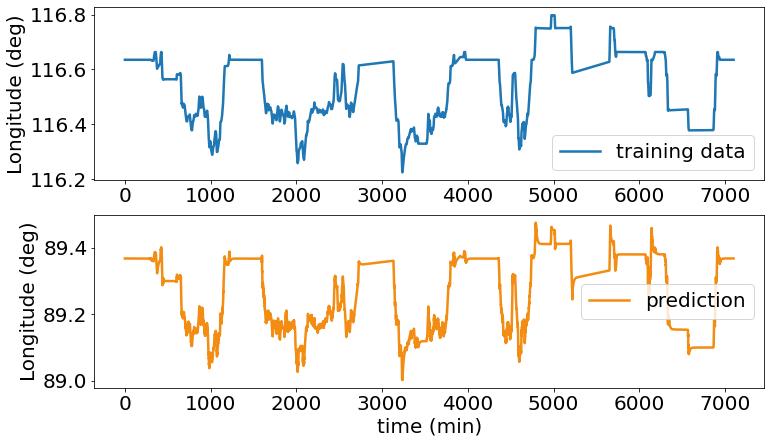

In [55]:
#plt.rcParams.update({'font.size': 16})
#plt.figure(figsize=(10,5))
#plt.plot(temp2[600:],label="training data", linewidth=2.5)
#plt.plot(finalpredict,label="prediction", linewidth=2.5)
#plt.legend()
#plt.xlabel("time")
#plt.ylabel("Longitude")
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(12,7))
plt.subplot(2, 1, 1)
plt.plot(temp2[600:],label="training data", linewidth=2.5)
plt.legend()
plt.ylabel('Longitude (deg)')


plt.subplot(2, 1, 2)
plt.plot(finalpredict, color='#F38C12',label="prediction", linewidth=2.5)
plt.legend()
plt.xlabel('time (min)')
plt.ylabel('Longitude (deg)')

In [22]:
#120 m
mse = sklearn.metrics.mean_squared_error(temp2[600:], finalpredict)

rmse = math.sqrt(mse)

print(rmse)

0.00120462562126504


In [ ]:
N=[min(Lat),min(Lon)]
# predict next 60 points for Lat
# using 7400-7700 to predict 7701-8000 &8001 to 8030
# using the difference between 7701-8000 to predict 8001 to 8030
model=load_model("taxi_bejing_model.h5")
predicted_series=[]
for i in range(360):
    temp=Lat[i+7400:i+7700] 
    temp=[number-N[0] for number in temp]
    temp=np.array(temp)
    temp=np.reshape(temp,(1,temp.shape[0],1))
    predicted_values_x=model.predict(temp)
    predicted_values_x = [number+N[0] for number in predicted_values_x]
    predicted_series.append(predicted_values_x)

diff_pred_real=[]
predicted_series=np.array(predicted_series)
predicted_series=np.reshape(predicted_series,(predicted_series.shape[0],1))
for i in range(len(predicted_series)):
    diff_pred_real.append((Lat[i+7700]-predicted_series[i]))
    
model=load_model("difference_model.h5")
predicted_difference=[]
coe=sum(diff_pred_real)/len(diff_pred_real)
coe=1/coe
diff_pred_real_adj=[]
for i in range(len(diff_pred_real)):
    diff_pred_real_adj.append(diff_pred_real[i]*coe)
    

for i in range(60):
    temp=diff_pred_real_adj[i:i+300]
    temp=np.array(temp)
    temp=np.reshape(temp,(1,temp.shape[0],1))
    predicted_values_x=model.predict(temp)
    predicted_values_x = [number/coe for number in predicted_values_x]
    predicted_difference.append(predicted_values_x)
predicted_difference=np.array(predicted_difference)
predicted_difference=np.reshape(predicted_difference,(predicted_difference.shape[0],1))
finalLat=[]

for i in range(len(predicted_difference)):
    finalLat.append(predicted_difference[i]+predicted_series[i+300])
plt.figure(figsize=(10,5))
plt.plot(Lat[8000:8060],label="training data")
plt.ticklabel_format(useOffset=False)
plt.plot(finalLat,label="prediction")
plt.ylim(0,50)
plt.legend()
plt.xlabel("time")
plt.ylabel("Lat")
#mse = sklearn.metrics.mean_squared_error(Lat[8000:8060], finalLat)
#rmse = math.sqrt(mse)
#print(rmse)
#15.678534 m

In [ ]:
# predict next 60 points for Lon
# using 7400-7700 to predict 7701-8000 &8001 to 8030
# using the difference between 7701-8000 to predict 8001 to 8030
model=load_model("taxi_bejing_model_2.h5")
predicted_series=[]
for i in range(360):
    temp=Lon[i+7400:i+7700] 
    temp=[number-N[1] for number in temp]
    temp=np.array(temp)
    temp=np.reshape(temp,(1,temp.shape[0],1))
    predicted_values_x=model.predict(temp)
    predicted_values_x = [number+N[1] for number in predicted_values_x]
    predicted_series.append(predicted_values_x)

diff_pred_real=[]
predicted_series=np.array(predicted_series)
predicted_series=np.reshape(predicted_series,(predicted_series.shape[0],1))
for i in range(len(predicted_series)):
    diff_pred_real.append((Lon[i+7700]-predicted_series[i]))
    
model=load_model("difference_model_2.h5")
predicted_difference=[]
coe=sum(diff_pred_real)/len(diff_pred_real)
coe=1/coe
diff_pred_real_adj=[]
for i in range(len(diff_pred_real)):
    diff_pred_real_adj.append(diff_pred_real[i]*coe)
    

for i in range(60):
    temp=diff_pred_real_adj[i:i+300]
    temp=np.array(temp)
    temp=np.reshape(temp,(1,temp.shape[0],1))
    predicted_values_x=model.predict(temp)
    predicted_values_x = [number/coe for number in predicted_values_x]
    predicted_difference.append(predicted_values_x)
predicted_difference=np.array(predicted_difference)
predicted_difference=np.reshape(predicted_difference,(predicted_difference.shape[0],1))
finalLon=[]
for i in range(len(predicted_difference)):
    finalLon.append(predicted_difference[i]+predicted_series[i+300])
plt.figure(figsize=(10,5))
plt.plot(Lon[8000:8060],label="training data")
plt.ticklabel_format(useOffset=False)
plt.plot(finalLon,label="prediction")
plt.ylim(0,120)
plt.legend()
plt.xlabel("time")
plt.ylabel("Lon")
#mse = sklearn.metrics.mean_squared_error(Lon[8000:8060],finalLon)
#rmse = math.sqrt(mse)
#print(rmse)
#1.71m

In [ ]:
resultTime=[]
for i in range(0,60):
    resultTime.append(i+1)
columns=['resultTime','finalLon','finalLat']

In [ ]:
finalLon = np.array(finalLon)
finalLon = finalLon.reshape(len(finalLon))
finalLon = finalLon.tolist()
print(finalLon)

finalLat = np.array(finalLat)
finalLat = finalLat.reshape(len(finalLat))
finalLat = finalLat.tolist()
print(finalLat)

In [16]:
with open('9318_result_E.csv','w',newline='') as file:
    writer=csv.writer(file)
    writer.writerow(columns)
    for j in zip(resultTime,finalLon,finalLat):
        writer.writerow(j)   

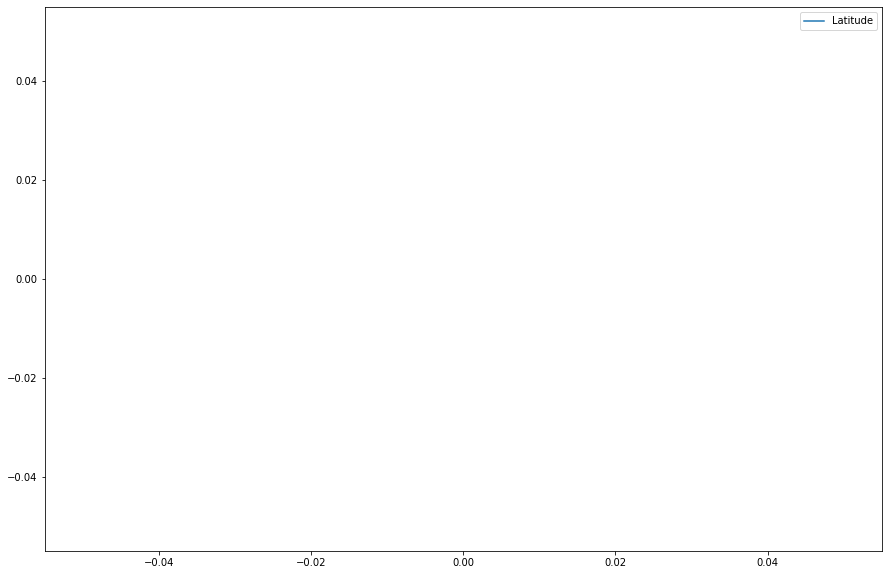

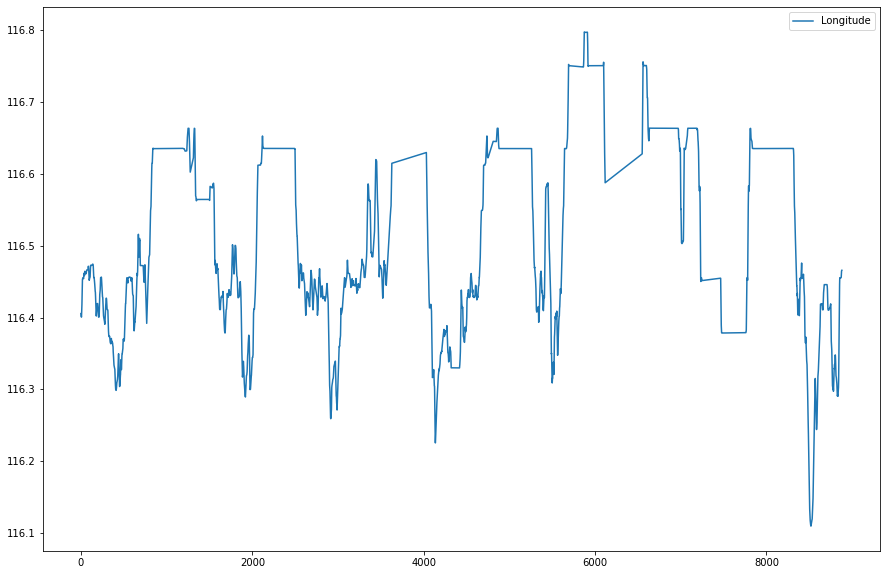

[39.316663722222216, 39.35999677499999, 39.403329827777775, 39.44666288055555, 39.489995933333326, 39.53332898611111, 39.576662038888884, 39.61999509166666, 39.66332814444444, 39.70666119722222, 39.74999425, 39.793327302777776, 39.83666035555555, 39.879993408333334, 39.92332646111111, 39.966659513888885, 40.00999256666667, 40.05332561944444, 40.09665867222222, 40.139991725, 40.18332477777778]
21


In [23]:
# take frequency
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import array as arr
import os
import json
import time
import math
import csv
import sklearn
import sklearn.metrics
from datetime import datetime
from sklearn.metrics import mean_squared_error
data= pd.read_csv("traffic/taxi_even/9318.csv")
Lan=[]
Lon=[]
Lat=data["Latitude"].tolist()
Lon=data["Longitude"].tolist()
Time=data["Time"].tolist()
plt.figure(figsize=(15,10))
plt.plot(Lan,label="Latitude")
plt.legend(loc='best')
plt.show()
plt.figure(figsize=(15,10))
plt.plot(Lon,label="Longitude")
plt.legend(loc='best')
plt.show()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import array as arr
import os
import json
import time
import math
import csv
from datetime import datetime
import pandas as pd
nonTaxi=[294,533,741,949,1088,1496,1946,2928,2944,3049,3159,3193,3949,4111,4176,4797,5069,5074,5098,5859,5971,6029,6210,6235,6274,6321,6655,6664,6716,7104,7145,7582,7629,7970,8125,8178,8208,8423,8553,8661,8695,8716,9108,9753,9873,10114,10351]
nonTaxi.append(740)
nonTaxi.append(1275)
nonTaxi.append(1276)
nonTaxi.append(2508)
nonTaxi.append(2559)
nonTaxi.append(3780)
nonTaxi.append(3578)
nonTaxi.append(3556)
nonTaxi.append(3014)
tooSmallList=[1275,2508,3242,4250,5763,6424,6803,6955,7358,7631,9429,9748,10239,10259,10263]
nonTaxi=nonTaxi+tooSmallList
latbmin=39.316663722222216
latbmax=40.18332477777778
lonbmin=116.11111531084333
lonbmax=116.80555523820313
diff_lat=(latbmax-latbmin)/20
diff_lon=(lonbmax-lonbmin)/20
latbou=[]
lonbou=[]
latbou.append(latbmin);
lonbou.append(lonbmin);

for i in range(1,20):
    latbou.append(latbmin+diff_lat*i)
    lonbou.append(lonbmin+diff_lon*i)
latbou.append(latbmax);
lonbou.append(lonbmax);
print(latbou)
print(len(lonbou))

In [33]:
obj={}
for i in range(1,21):
    for j in range(1,21):
        obj["A"+str(i)+"_"+str(j)]=[]
        obj["A"+str(i)+"_"+str(j)].append(0)
for j in range(len(Time)):
    if j >= 8882:
        break
    currLat=Lat[j]
    currLon=Lon[j]
    latn=1
    while not (latbou[latn-1]<=currLat<=latbou[latn]):
        latn+=1
        if (latn>20):
            break
    lonn=1
    while not (lonbou[lonn-1]<=currLon<=lonbou[lonn]):
        lonn+=1
        if(lonn>20):
            break
    if(lonn<=20 and latn<=20):
        area="A"+str(latn)+"_"+str(lonn)
        obj[area][0] +=1

In [35]:
print(obj)

{'A1_1': [0], 'A1_2': [0], 'A1_3': [0], 'A1_4': [0], 'A1_5': [0], 'A1_6': [0], 'A1_7': [0], 'A1_8': [0], 'A1_9': [0], 'A1_10': [0], 'A1_11': [0], 'A1_12': [0], 'A1_13': [0], 'A1_14': [0], 'A1_15': [0], 'A1_16': [0], 'A1_17': [0], 'A1_18': [0], 'A1_19': [0], 'A1_20': [0], 'A2_1': [0], 'A2_2': [0], 'A2_3': [0], 'A2_4': [0], 'A2_5': [0], 'A2_6': [0], 'A2_7': [0], 'A2_8': [0], 'A2_9': [0], 'A2_10': [0], 'A2_11': [0], 'A2_12': [0], 'A2_13': [0], 'A2_14': [0], 'A2_15': [0], 'A2_16': [0], 'A2_17': [0], 'A2_18': [0], 'A2_19': [0], 'A2_20': [0], 'A3_1': [0], 'A3_2': [0], 'A3_3': [0], 'A3_4': [0], 'A3_5': [0], 'A3_6': [0], 'A3_7': [0], 'A3_8': [0], 'A3_9': [0], 'A3_10': [0], 'A3_11': [0], 'A3_12': [0], 'A3_13': [0], 'A3_14': [0], 'A3_15': [0], 'A3_16': [0], 'A3_17': [0], 'A3_18': [0], 'A3_19': [0], 'A3_20': [0], 'A4_1': [0], 'A4_2': [0], 'A4_3': [0], 'A4_4': [0], 'A4_5': [0], 'A4_6': [0], 'A4_7': [0], 'A4_8': [0], 'A4_9': [0], 'A4_10': [0], 'A4_11': [0], 'A4_12': [0], 'A4_13': [0], 'A4_14': [0],

In [37]:
table=list(obj.values())
#table.insert(0, Time)
print(len(table))
table = np.array(table).T
print(type(table))
table = [[e for e in row] for row in table]
print(type(table))
print(len(table))
print(len(table[0]))

headerList1=[]
for i in range(1,21):
    for j in range(1,21):
        headerList1.append("A"+str(i)+"_"+str(j))

table = pd.DataFrame(table)
table.to_csv('9318_density.csv', index=False, header=headerList1)

400
<class 'numpy.ndarray'>
<class 'list'>
1
400
